In [1]:
%matplotlib inline
%config InlineBacken.figure_format = 'svg'

In [2]:
import subprocess

In [3]:
author_dates = subprocess.check_output(['git', 'log', '--pretty=%aI'],
                                       universal_newlines=True) \
                         .splitlines()

In [4]:
from datetime import timezone
import pandas as pd

In [5]:
s = pd.Series([pd.to_datetime(aI).astimezone(timezone.utc)
               for aI
               in author_dates])

In [6]:
s.head()

0   2019-05-17 14:48:38+00:00
1   2019-05-17 14:47:28+00:00
2   2019-05-17 14:46:43+00:00
3   2019-05-17 02:33:49+00:00
4   2019-05-15 20:33:09+00:00
dtype: datetime64[ns, UTC]

In [7]:
s.describe()

count                           135
unique                          135
top       2017-07-14 19:44:54+00:00
freq                              1
first     2017-07-12 19:54:07+00:00
last      2019-05-17 14:48:38+00:00
dtype: object

In [8]:
from matplotlib.dates import DateFormatter

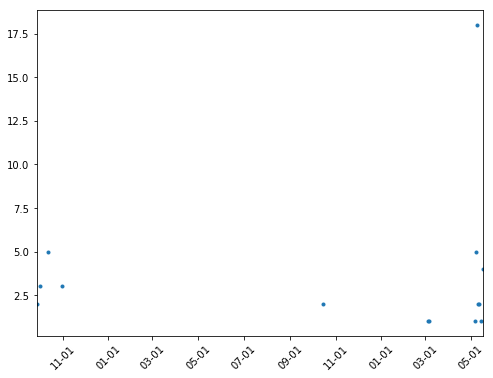

In [9]:
last_50 = s.nlargest(50).groupby(s.dt.date).agg('count')
ax = last_50.plot(style='.', rot=45, figsize=(8,6))
ax.get_xaxis().set_major_formatter(DateFormatter('%m-%d'))